In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

Dataset Loaded: 2515 images
Image Shape: (128, 128, 3)


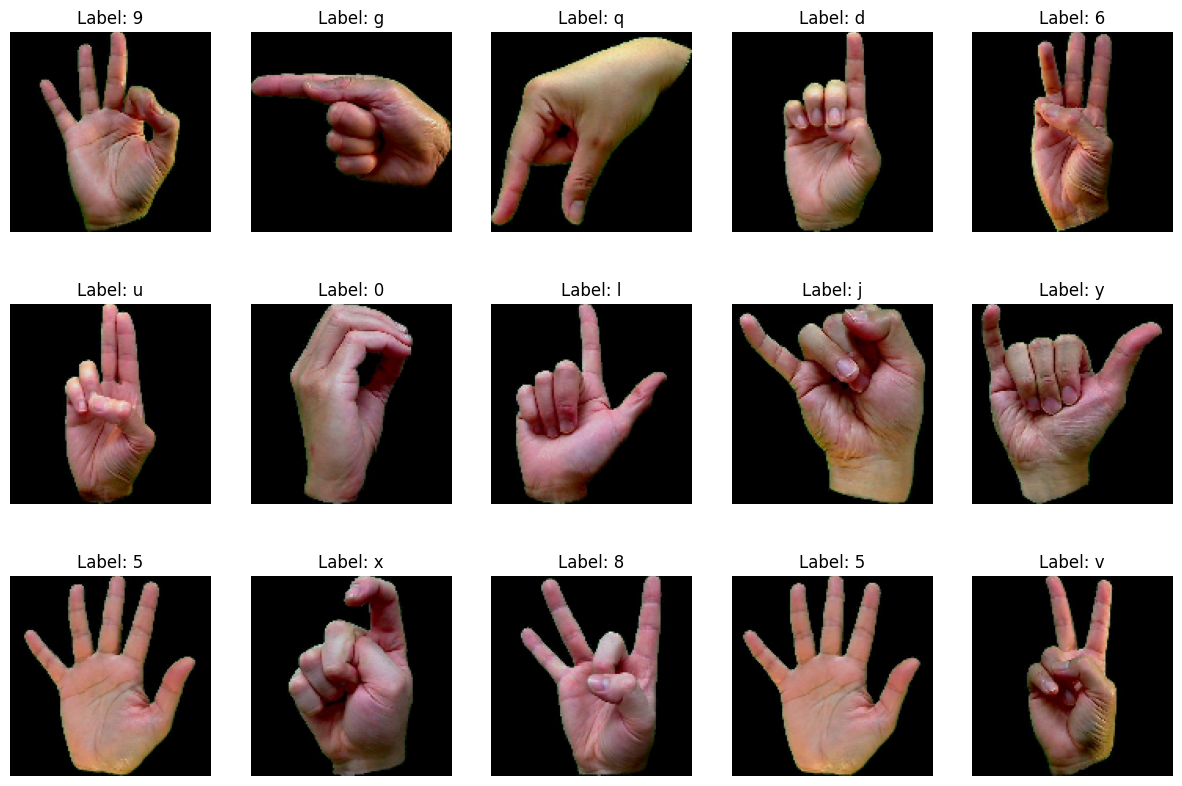

In [14]:
DATASET_DIR = '/content/drive/MyDrive/asl_dataset'

IMG_HEIGHT = 128
IMG_WIDTH = 128

images = []
labels = []

for folder_name in sorted(os.listdir(DATASET_DIR)):
  folder_path = os.path.join(DATASET_DIR, folder_name)

  if os.path.isdir(folder_path):
    label = folder_name

    for img_name in os.listdir(folder_path):
      img_path = os.path.join(folder_path, img_name)

      # load and resize image
      img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
      img_array = img_to_array(img) / 255.0

      images.append(img_array)
      labels.append(label)

images = np.array(images)
labels = np.array(labels)

print(f'Dataset Loaded: {images.shape[0]} images')
print(f'Image Shape: {images.shape[1:]}')

fig,axes = plt.subplots(3,5, figsize=(15,10))
axes = axes.ravel()

for i in range(15):
  idx = np.random.randint(0, len(images))
  axes[i].imshow(images[idx])
  axes[i].set_title(f'Label: {labels[idx]}')
  axes[i].axis('off')

plt.tight_layout
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# encode labels (a-z, 0-9 -> numerical labels)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)

# print dataset shapes
print(f"Training set: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {X_test.shape}, Labels: {y_test.shape}")

# display label encoding map
label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print('\Label Mapping:')
for label, idx in label_map.items():
  print(f"{label}: {idx}")

Training set: (2012, 128, 128, 3), Labels: (2012,)
Testing set: (503, 128, 128, 3), Labels: (503,)
\Label Mapping:
0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6
7: 7
8: 8
9: 9
a: 10
b: 11
c: 12
d: 13
e: 14
f: 15
g: 16
h: 17
i: 18
j: 19
k: 20
l: 21
m: 22
n: 23
o: 24
p: 25
q: 26
r: 27
s: 28
t: 29
u: 30
v: 31
w: 32
x: 33
y: 34
z: 35


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# define the CNN model
def create_model(input_shape, num_classes):
  model = Sequential()

  model.add(Conv2D(32,(3,3), activation='relu', input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))

  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))

  model.add(Conv2D(128, (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))

  model.add(Conv2D(256, (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))

  model.add(Flatten())

  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  # model.add(Dense(36, activation='relu'))
  # model.add(Dropout(0.5))

  model.add(Dense(num_classes, activation='softmax'))

  # optimizer = Adam
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

num_classes = len(np.unique(y_train))

#create the model
input_shape = X_train[0].shape
model = create_model(input_shape, num_classes)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 36)                  │          18,468 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,127,908 (19.56 MB)

 Trainable params: 5,126,948 (19.56 MB)

 Non-trainable params: 960 (3.75 KB)

In [31]:
# from tensorflow.keras.callbacks import EarlyStopping

# early stopping to prevent overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# training parameters
EPOCHS = 30
BATCH_SIZE = 32


# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1, shuffle=True)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.2972 - loss: 5.0953 - val_accuracy: 0.0577 - val_loss: 8.3917
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7191 - loss: 0.9144 - val_accuracy: 0.0278 - val_loss: 12.7849
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.7869 - loss: 0.6558 - val_accuracy: 0.0278 - val_loss: 13.4496
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.8611 - loss: 0.4327 - val_accuracy: 0.0577 - val_loss: 10.8037
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8661 - loss: 0.3545 - val_accuracy: 0.1213 - val_loss: 7.3729
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.8930 - loss: 0.2821 - val_accuracy: 0.4414 - val_loss: 2.3244
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.8945 - loss: 0.3057 - val_accuracy: 0.6600 - val_loss: 1.1628
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.9075 - loss: 0.2499 - val_accuracy: 0.9066 

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#define test generator
test_datagen = ImageDataGenerator(rescale=1./255) # only rescale, no augmentation for test data

test_generator = test_datagen.flow_from_directory(directory='/content/drive/MyDrive/asl_dataset', target_size=(128,128), batch_size=32,class_mode='sparse', shuffle=False)

#display class indices (for confusion matrix later)
label_map = list(test_generator.class_indices.keys())
print('Class Labels:', label_map)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss: .4f}')
print(f"Test Accuracy: {test_accuracy: .4%}")

Found 2515 images belonging to 36 classes.
Class Labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 470ms/step - accuracy: 0.9764 - loss: 0.0577
Test Loss:  0.0715
Test Accuracy:  97.6938%


79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 429ms/step


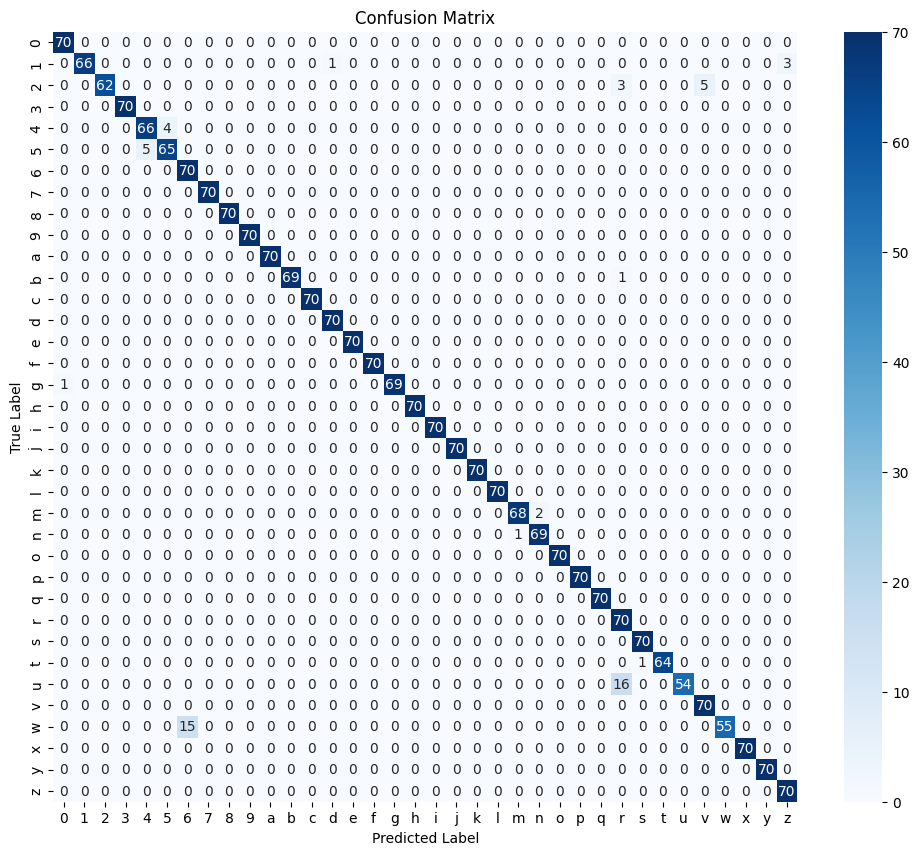


 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        70
           1       1.00      0.94      0.97        70
           2       1.00      0.89      0.94        70
           3       1.00      1.00      1.00        70
           4       0.93      0.94      0.94        70
           5       0.94      0.93      0.94        70
           6       0.82      1.00      0.90        70
           7       1.00      1.00      1.00        70
           8       1.00      1.00      1.00        70
           9       1.00      1.00      1.00        70
           a       1.00      1.00      1.00        70
           b       1.00      0.99      0.99        70
           c       1.00      1.00      1.00        70
           d       0.99      1.00      0.99        70
           e       1.00      1.00      1.00        70
           f       1.00      1.00      1.00        70
           g       1.00      0.99      0.99        70
  

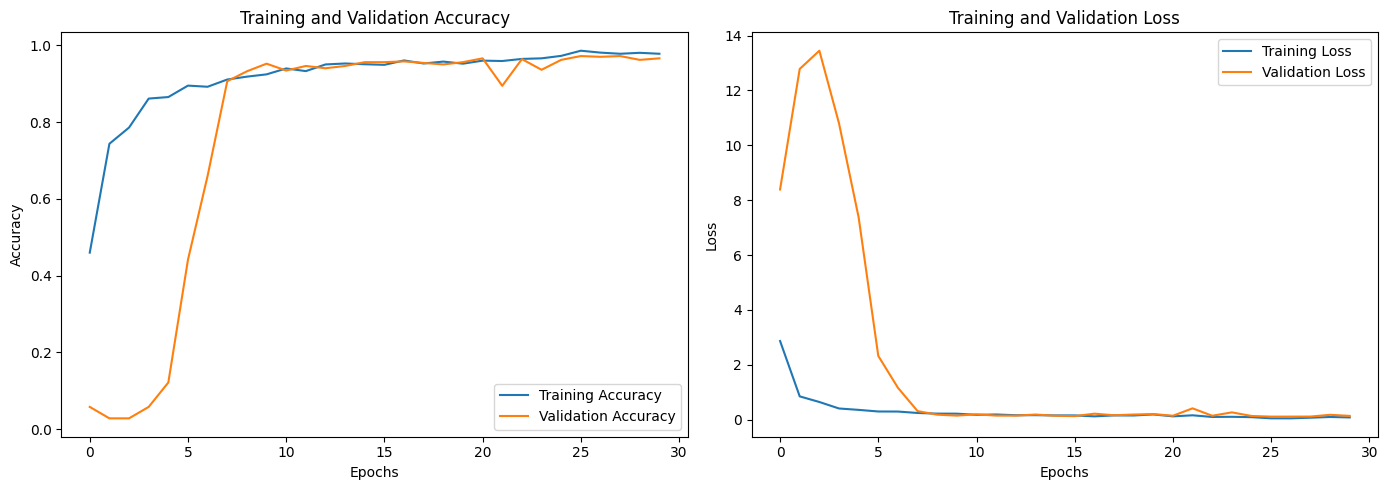

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_map, yticklabels=label_map)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print('\n Classification Report:')
print(classification_report(y_true, y_pred, target_names=label_map))

history_dict = history.history

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()